In [27]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
# remove ID column
df = df.iloc[:,1:]

In [13]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


In [14]:
# Label encode species convert setosa, versicolor and virginica in 1,2,3 form
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

In [15]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0


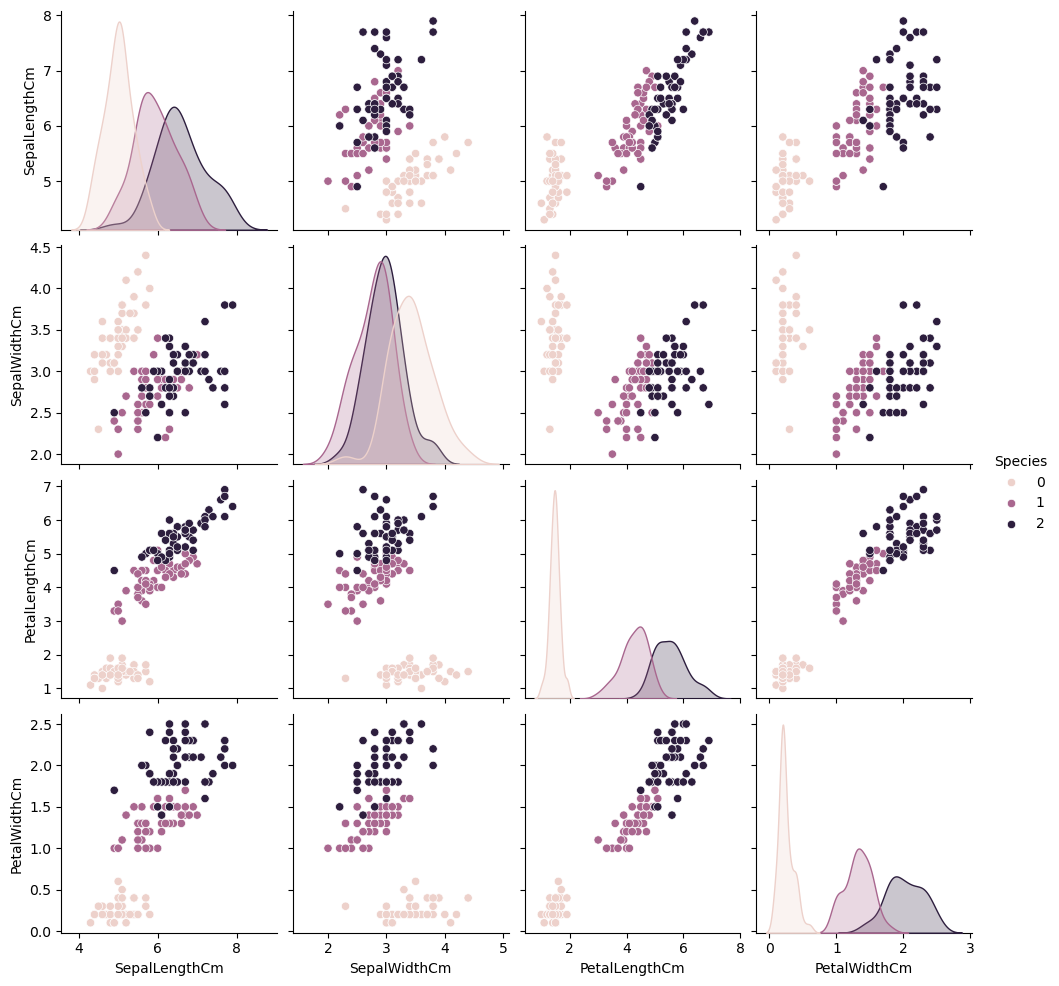

In [16]:
import seaborn as sns
sns.pairplot(df,hue='Species')

In [17]:
new_df = df[df['Species'] != 0][['SepalLengthCm','SepalWidthCm','Species']]

In [18]:
new_df.head()

,SepalLengthCm,SepalWidthCm,Species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1


In [19]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [23]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [24]:
estimators = [('lr', clf1),('rf',clf2),('knn',clf3)]

In [28]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

lr 0.81
rf 0.73
knn 0.76


In [29]:
from sklearn.ensemble import VotingClassifier

# Hard Voting

In [33]:
vc = VotingClassifier(estimators=estimators)
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.77


# Soft Voting

In [34]:
vc1 = VotingClassifier(estimators=estimators, voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.76


# Weighted Voting

In [ ]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators = estimators, voting='soft', weights=[i,j,k])
            x = cross_val_score(vc,X,y, cv=10, scoring='accuracy')
            print("for i={}, j={}, k={}".format(i,j,k),np.round(np.mean(x),2))

# Classifiers of Same Algo

In [47]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC

X,y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=2)

svm1 =SVC(probability=True, kernel = 'poly', degree=1)
svm2 =SVC(probability=True, kernel = 'poly', degree=2)
svm3 =SVC(probability=True, kernel = 'poly', degree=3)
svm4 =SVC(probability=True, kernel = 'poly', degree=4)
svm5 =SVC(probability=True, kernel = 'poly', degree=5)

estimators = [('svm1',svm1),('svm2',svm2), ('svm3',svm3), ('svm4',svm4),('svm5',svm5)]

for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

svm1 0.77
svm2 0.64
svm3 0.72
svm4 0.66
svm5 0.65


In [48]:
vc1 = VotingClassifier(estimators=estimators, voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.76
